# Caso Práctico: Clasificación de imágenes con Machine Learning

### Enunciado y contexto del ejercicio

En este ejercicio práctico vamos a enfrentarnos a un problema real muy común, la clasificación de imágenes. Para ello, se propone la construcción de una aplicación en Python 3 que utilice técnicas de Inteligencia Artificial para identificar el número que aparece en un conjunto de imágnes de número escritos a mano.

A continuación se muestran los detalles del conjunto de datos (imágenes) que vamos a utilizar para el desarrollo de este caso práctico.

### Dataset

La base de datos del MNIST (base de datos modificada del Instituto Nacional de Normas y Tecnología) es una gran base de datos de dígitos manuscritos que se utiliza comúnmente para el entrenamiento de diversos sistemas de procesamiento de imágenes. La base de datos también se utiliza ampliamente para el entrenamiento y el ensayo en el campo del aprendizaje automático. Se creó "remezclando" las muestras de los conjuntos de datos originales del NIST. Los creadores consideraron que, dado que el conjunto de datos de capacitación del NIST fue tomado de los empleados de la Oficina del Censo de los Estados Unidos, mientras que el conjunto de datos de prueba fue tomado de los estudiantes de secundaria de los Estados Unidos, no era muy adecuado para los experimentos de aprendizaje automático. Además, las imágenes en blanco y negro del NIST fueron normalizadas para que encajaran en un cuadro delimitador de 28x28 píxeles, lo que introdujo niveles de escala de grises.

La base de datos del MNIST contiene 60.000 imágenes de entrenamiento y 10.000 imágenes de prueba. La mitad del conjunto de entrenamiento y la otra mitad del conjunto de pruebas se tomaron del conjunto de datos de entrenamiento del NIST, mientras que la otra mitad del conjunto de entrenamiento y la otra mitad del conjunto de pruebas se tomaron del conjunto de datos de pruebas del NIST.Los creadores originales de la base de datos mantienen una lista de algunos de los métodos probados en ella. En su papel original, utilizan una máquina de soporte vectorial para obtener una tasa de error del 0,8%. En 2017 se ha publicado un conjunto de datos ampliado similar al MNIST llamado EMNIST, que contiene 240.000 imágenes de entrenamiento y 40.000 imágenes de prueba de dígitos y caracteres escritos a mano.

### 1. Lectura y visualización del conjunto de datos

Tal y como comentábamos en el enunciado, vamos a utilizar un algoritmo de Machine Learning/IA para resolver este problema de clasificación de imágenes. El tipo de algoritmo que vamos a utilizar se basa en aprendizaje supervisado, lo que quiere decir que, para poder identificar el número que aparece en una imagen primero debemos "entrenar" el algoritmo con otras imágenes de números escritos a mano donde le indicamos el valor correcto.

Antes de implementar el algoritmo de Machine Learning, vamos a implementar código para visualizar el conjunto de datos

<div style="background-color:#D9EEFF;color:black;padding:2%;">
Importa el conjunto de datos y visualiza su contenido.
</div>

In [5]:
# Importamos el conjunto de datos
from sklearn.datasets import fetch_openml

# Añadimos as_frame=False para forzar la devolución de un array
#mnist = fetch_openml('mnist_784',  as_frame=False)
mnist = fetch_openml(name='mnist_784', as_frame=False, parser='auto')

**Pista 1**: Comienza visualizando los datos en bruto, el conjunto de datos importado tiene atributos y métodos que nos permiten acceder a la información.

In [6]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [7]:
mnist.data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [8]:
mnist.target[0]

'5'

<div style="background-color:#D9EEFF;color:black;padding:2%;">
Tal y como has podido observar en las celdas anteriores, las imágenes vienen representadas como un conjunto de números enteros que representan los pixeles. Utiliza la librería Matplotlib para visualizar las imágenes en formato gráfico.
</div>

**Pista 2**: Revisa las siguientes estructuras dentro Matplotlib para visual las imágenes en formato gráfico:
* `pyplot`
* `imshow`

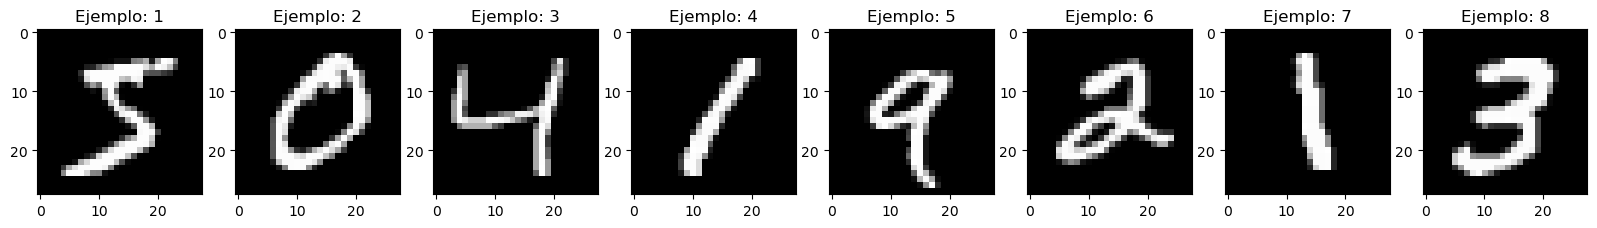

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for index, img in zip(range(1, 9), mnist.data[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(img, (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: {}'.format(index))
plt.show()

In [10]:
mnist.target[:8]

array(['5', '0', '4', '1', '9', '2', '1', '3'], dtype=object)

<div style="background-color:#D9EEFF;color:black;padding:2%;">
Visualiza el conjunto de datos en forma de tabla transformando el array de Numpy en un DataFrame de Pandas. Ten en cuenta que cada fila del DataFrame debe corresponderse con el conjunto de pixels de una imagen y cada columna con un pixel concreto para todas las imágenes
</div>

In [11]:
# Conviertiendo el conjunto de datos en un DataFrame de Pandas
import pandas as pd

df = pd.DataFrame(mnist.data)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3. División del conjunto de datos

Una vez que hemos visualizado nuestro conjunto de datos y comprendemos el tipo de elementos que contiene. Lo siguiente que vamos a hacer es dividir el conjunto de datos en dos subconjuntos: **Subconjunto de entrenamiento** y **Subconjunto de pruebas**.

Estas divisiones del conjunto de datos son fundamentales cuando abordamos la resolución de un problema de este tipo utilizando téncicas de Machine Learning. 

El **subconjunto de entrenamiento** lo utilizaremos para entrenar nuestro algoritmo y que "aprenda" como son las imágenes y los números que aparecen en ellas escritos a mano. El **subconjunto de pruebas**, lo utilizaremos al final del ejercicio para evaluar qué tal se comporta nuestro algoritmo con imágenes que no ha visto nunca (que no se encontraban en el subconjunto de entrenamiento)

<div style="background-color:#D9EEFF;color:black;padding:2%;">
Divide el conjunto de datos de imágenes en un subconjunto de entrenamiento y un subconjunto de pruebas. El subconjunto de entrenamiento debe contener el 75% de las imágenes y el subconjunto de pruebas el 25% de las imágenes. 
</div>

**Pista:** Para realizar esta partición, revisa el paquete externo [Sklearn](https://scikit-learn.org/stable/). Este paquete nos permite importar algoritmos y funcionalidad relacionada con diferentes técnicas de Machine Learning. Concretamente, revisa la función `train_test_split` de Sklearn. 

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.25)

In [13]:
print(len(X_train))

52500


In [14]:
y_test[0]

'0'

### 4. Entrenamiento del algoritmo

Una vez dividido nuestro conjunto de datos, ya estamos listo para comenzar el entrenamiento. Para ello, lo primero que tenemos que hacer es seleccionar un algoritmo de Machine Learning e implementarlos de alguna forma.

Para este caso de uso práctico, vamos a utilizar uno de los algoritmos de Inteligencia Artificial más sencillitos, que se denomina Perceptrón, y que se corresponde con la base en la que se fundamentan las Redes Neuronales Artificiales Profundas.

Más información: https://es.wikipedia.org/wiki/Perceptr%C3%B3n_multicapa

<div style="background-color:#D9EEFF;color:black;padding:2%;">
Implementa el algoritmo Perceptron y entrenalo utilizando el subconjunto de entrenamiento.
</div>

**Pista:** Este tipo de algoritmos son complicados de implementar desde cero y requiere conocimientos avanzados de disciplinas técnias como las Matemáticas para hacerlo de manera eficiente. En lugar de implementar el algoritmo desde cero, revisa las clases que nos proporciona Sklearn, concretamente, revisa la clase `Perceptron`

In [15]:
from sklearn.linear_model import Perceptron

In [16]:
clf = Perceptron(max_iter=2000, random_state=40, n_jobs=-1)

In [17]:
clf.fit(X_train, y_train)

Perceptron(max_iter=2000, n_jobs=-1, random_state=40)

### 5. Predicción con el conjunto de pruebas

¡Enhorabuena! Ya has entrenado el Perceptrón y el algoritmo está listo para comenzar a realizar clasificación de nuevas imágenes que no se encontraban en el subconjunto de entrenamiento.

<div style="background-color:#D9EEFF;color:black;padding:2%;">
Utiliza el objeto Perceptrón que has instanciado en la sección anterior para realizar predicciones para los ejemplos que se encuentran en el subconjunto de pruebas. Utiliza alguna métrica para evaluar qué tal se esta comportando el algoritmo.
</div>

**Pista:** Revisa los métodos que expone un objeto de la clase Perceptrón. Entre los métros disponibles, presta especial atención al método `predict()`

In [18]:
X_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  58,
       118,  16,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  26,
       235, 245, 254,  34,   0,  16,  90,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [19]:
y_pred = clf.predict(X_test)

In [20]:
y_pred

array(['0', '0', '7', ..., '9', '0', '2'], dtype='<U1')

In [21]:
len(y_pred)

17500

In [22]:
len(y_test)

17500

**Pista 2:** Para comparar las predicciones de nuestro algoritmo con las etiquetas correctas, utiliza una métrica como [f1 score](https://en.wikipedia.org/wiki/F-score). No hace falta que implementes esta métrica desde cero, Sklearn nos ofrece funciones implementadas que podemos utilizar. Revisa la función `f1_score` de Sklearn.

In [23]:
# Mostramos el f1_score resultante de la clasificación
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="weighted")

0.8323018812843008

### 6. Mostrando las imagenes mal clasificadas

En el apartado anterior hemos podido comprobar qué tal se comporta nuestro algoritmo entrenado. Para poder seguir iterando y mejorando el algoritmo y el conjunto de datos, es recomendable visualizar alguno de los ejemplos que no han sido clasificados correctamente con el objetivo de tratar de determinar algún problema específico.

<div style="background-color:#D9EEFF;color:black;padding:2%;">
Implementa el código en Python que consideres necesario para visualizar por pantalla algunas de las imágenes que han sido clasificadas de manera errónea por el algoritmo.
</div>

In [24]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
index_errors = []

for etiqueta, predict in zip(y_test, y_pred):
    if etiqueta != predict:
        index_errors.append(index)
    index += 1

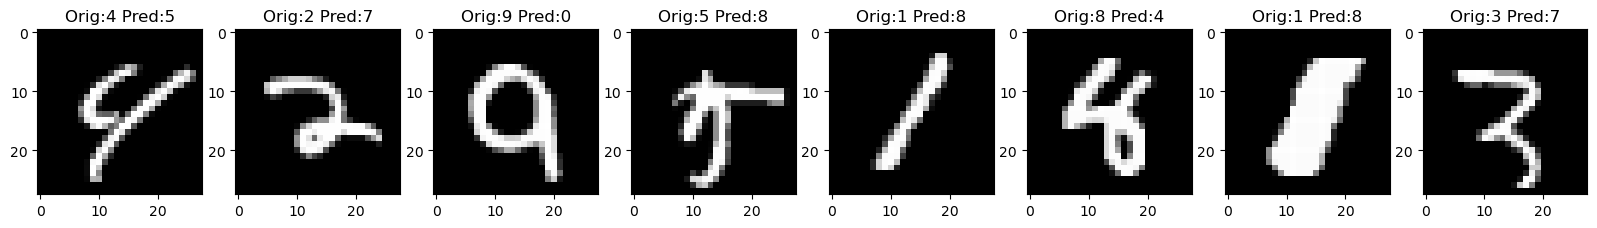

In [26]:
plt.figure(figsize=(20, 4))

for index, img_index in zip(range(1, 9), index_errors[8:16]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(X_test[img_index], (28,28)), cmap=plt.cm.gray)
    plt.title('Orig:' + str(y_test[img_index]) + ' Pred:' + str(y_pred[img_index]))
plt.show()